In [1]:
import sys
sys.path.append('..')
import ugent

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')
mpl.rc('font', family='serif', size=14, serif="Computer Modern Roman")

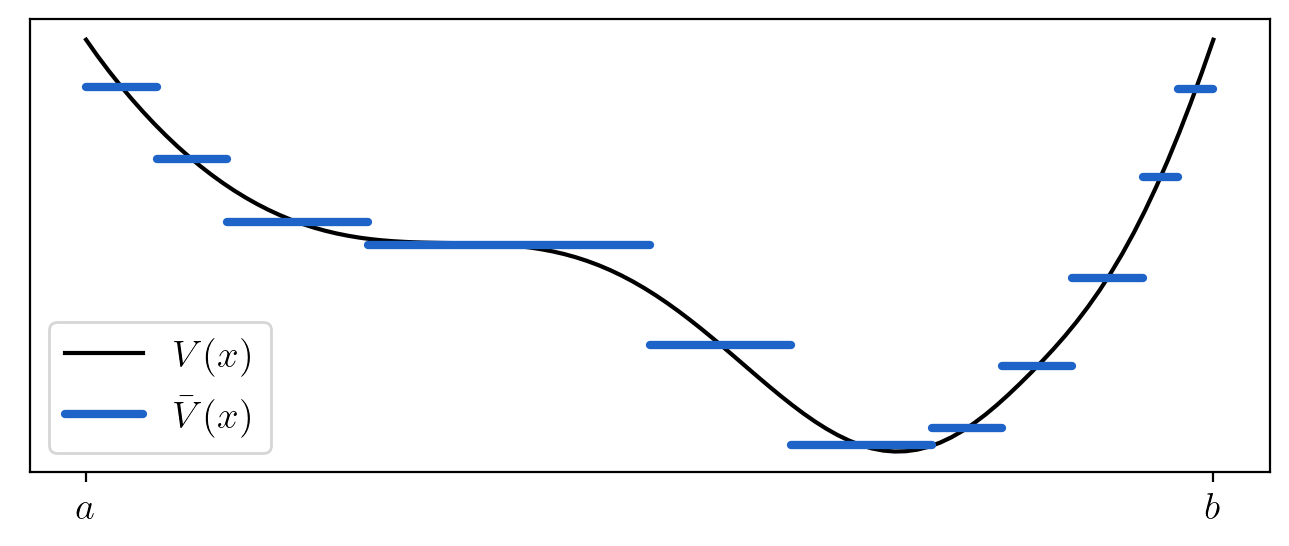

In [104]:
import numpy as np
from math import pi

def V(x):
    return (np.sin(x**1.6*2*pi)+1)**1.52 + (4*(x-.5))**2

fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

xs = np.linspace(0, 1, 100)
ax.plot(xs, V(xs), c=ugent.zwart, label="$V(x)$")

def get_intervals(V, a, b, eps=0.1):
    if abs(V(a) - V(b)) < eps and abs(V((a+b)/2) - V(b)) < eps/2:
        yield (a, b)
    else:
        c = (a+b)/2
        yield from get_intervals(V, a, c, eps=eps)
        yield from get_intervals(V, c, b, eps=eps)

intervals = get_intervals(V, 0, 1, eps=1.2)

for i, (a, b) in enumerate(intervals):
    v = V((a+b)/2)
    kwargs = dict(c=ugent.blauw, lw=3, solid_capstyle="round")
    if i == 0:
        kwargs["label"] = "$\\bar{V}(x)$"
    ax.plot((a, b), (v, v), **kwargs)


ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([0, 1])
ax.xaxis.set_ticklabels(['$a$', '$b$'])
ax.legend()

plt.savefig('cpm_constant_approx.pdf', bbox_inches="tight")

In [43]:
intervals

[(0.0, 0.562835275692479),
 (0.562835275692479, 0.6154668546398475),
 (0.6154668546398475, 0.668098433587216),
 (0.668098433587216, 0.7207300125345844),
 (0.7207300125345844, 0.7733615914819527),
 (0.7733615914819527, 0.8259931704293212),
 (0.8259931704293212, 0.8786247493766897),
 (0.8786247493766897, 0.931256328324058),
 (0.931256328324058, 0.9838879072714264),
 (0.9838879072714264, 1.0365194862187947),
 (1.0365194862187947, 1.0891510651661633),
 (1.0891510651661633, 1.1417826441135317),
 (1.1417826441135317, 1.1944142230609),
 (1.1944142230609, 1.2470458020082686),
 (1.2470458020082686, 1.299677380955637),
 (1.299677380955637, 1.3523089599030054),
 (1.3523089599030054, 1.4049405388503737),
 (1.4049405388503737, 1.457572117797742),
 (1.457572117797742, 1.0)]